In [122]:
import matplotlib.pyplot as plt
import numpy as np
import math


## primer


In [123]:
def f(x): 
    return 3*x**2 - 4*x +5

f(3.0)

20.0

In [124]:
np.linspace(-5,5, 25)

array([-5.        , -4.58333333, -4.16666667, -3.75      , -3.33333333,
       -2.91666667, -2.5       , -2.08333333, -1.66666667, -1.25      ,
       -0.83333333, -0.41666667,  0.        ,  0.41666667,  0.83333333,
        1.25      ,  1.66666667,  2.08333333,  2.5       ,  2.91666667,
        3.33333333,  3.75      ,  4.16666667,  4.58333333,  5.        ])

In [125]:
xs = np.arange(-5, 5, 0.5)
xs

array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

In [126]:
ys = f(xs)
ys

array([100.  ,  83.75,  69.  ,  55.75,  44.  ,  33.75,  25.  ,  17.75,
        12.  ,   7.75,   5.  ,   3.75,   4.  ,   5.75,   9.  ,  13.75,
        20.  ,  27.75,  37.  ,  47.75])

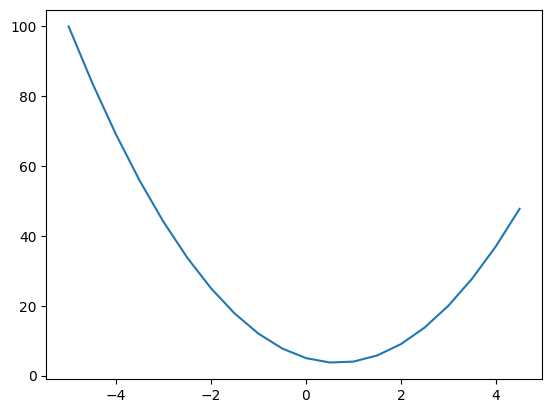

In [127]:
plt.plot(xs,ys)

In [128]:
x =3.0
h = 1.0
f(x)

20.0

In [129]:
f(x+h)

37.0

In [130]:
(f(x+h) - f(x))/h

17.0

In [131]:
# consider h~~~0  i.e. very small then 

h=0.0001

(f(x+h) - f(x))/h

14.000300000063248

In [132]:
(f(x+h) - f(x))/h

14.000300000063248

# primer over


In [133]:
a = 2.0
b = -3.0
c = 10.0

d = a* b + c
d

4.0

In [134]:

h= 0.001

a = 2.0
b = -3.0
c = 10.0

d1 = a* b + c
a+=h
print("modifying a by h")
d2 = a* b + c
print(f"d1 ={d1}")
print(f"d2 ={d2}")
print(f"slope ={(d2-d1)/h}")  # increasing a decrease  d2  by a factor of 3

modifying a by h
d1 =4.0
d2 =3.997
slope =-3.0000000000001137


In [135]:

h= 0.001

a = 2.0
b = -3.0
c = 10.0

d1 = a* b + c
b+=h
print("modifying b by h")
d2 = a* b + c
print(f"d1 ={d1}")
print(f"d2 ={d2}")
print(f"slope ={(d2-d1)/h}")  # increasing b increases  d2  by a factor of 2

modifying b by h
d1 =4.0
d2 =4.002
slope =1.9999999999997797


In [136]:
# visualize graph

from graphviz import Digraph


def trace(root):
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges


def draw_dot(root, format="svg", rankdir="LR"):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ["LR", "TB"]
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={"rankdir": rankdir})  # , node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(
            name=str(id(n)),
            label="{ %s| data %.4f | grad %.4f }" % (n.label, n.data, n.grad),
            # label="{ %s| data %.4f  }" % (n.label, n.data),
            shape="record",
        )
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [137]:
from typing import Union
import math

class Value:
    def __init__(self,data:float, _children=(), _op:str="", label:str=""):
        self.data = data
        self.grad = 0.0 # mean no effect
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self._backward = lambda:None  # this will be for leaf node
        

    def __repr__(self)->str:
        return f"Value(data={self.data})"
    # __str__ = __repr__

    def __str__(self)->str:
        return f"Value(data={self.data}, label={self.label})"
    
    # def __str__(self):
    #     "return string only"
    #     return f"Value(data={self.data})"

    def __add__(self, other: Union[float, 'Value']) -> 'Value':   # quotaion marks to cater naming issues
        other = other if isinstance(other, Value) else Value(other)
        if (isinstance(other, Value)):
            out =  Value(self.data + other.data, (self, other), "+")

            def _backward():
                self.grad += 1.0 * out.grad
                other.grad +=  1.0 * out.grad
            
            out._backward = _backward
            return out
        else:
            raise TypeError("Operand must be of type 'Value', 'float', 'int")


    def __radd__(self, other: Union[float, 'Value']): #reflected addition
        return self + other
    
    def __neg__(self):
        return Value(self.data * -1)
    
    def __sub__(self, other):
        return self + (-other)


    def __mul__(self, other: Union[float, 'Value']) -> 'Value':   # quotaion marks to cater naming 
        other = other if isinstance(other, Value) else Value(other)

        if (isinstance(other, Value)):

            out = Value(self.data * other.data, (self, other),"*")
            def _backward():
                self.grad += other.data * out.grad
                other.grad += self.data * out.grad
            
            
            out._backward = _backward
            return out
        else:
            raise TypeError("Operand must be of type 'Value', 'float', 'int")


    def __rmul__(self, other: Union[float, 'Value']): #reflected mul
        return self * other
    
    def __truediv__(self, other):
        # div  = a/b  => a* 1/b =? a*b**-1
        return self * other**-1
    
    def __pow__(self, other):
        assert isinstance(other, (int,float)), "only suppoerts int/float powers"
        out = Value(self.data**other,(self,), f'**{other}')

        def _backward():
            self.grad += other* (self.data**(other-1))  * out.grad 
        out._backward = _backward

        return out

    
    def tanh(self):
        n = self.data
        t = (math.exp(2 * n) - 1) / (math.exp(2 * n) + 1)
        out = Value(t, (self,), "tanh")

        def _backward():
            """it will local derivative of tanh() whihch is 1-tanx**2"""
            self.grad += (1 - t**2) * out.grad
            # (1 - t**2) local derivative
            # chain rule: out.grad


        out._backward = _backward
        return out
    

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
        def _backward():
            self.grad += out.data * out.grad  # derivative of e**x is e**x

        out._backward = _backward

        return out
    






    def backward(self):
        # to calculate backpropagating in order
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0  # o.grad
        
        for node in reversed(topo):
            node._backward()

    


# we'll compute derivative of L with  respect to each node. so in more simpler terms, compute derivative of L with respect to inputs does same things as derivative of L with respect to all intermediate is calculated too-- not skipped.that's what chain rule is all about: Consider intrmediate states.


# we'll just calculate derivative of weights because input data is fixed
# deriavtive of x with itself will be 1

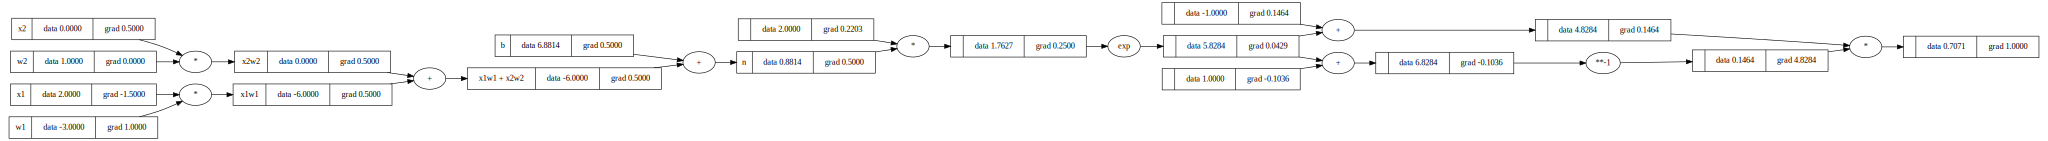

In [138]:
x1 = Value(2.0, label="x1")
w1 = Value(-3.0, label="w1")
x2 = Value(0.0, label="x2")
w2 = Value(1.0, label="w2")
b = Value(6.88137, label="b")

x1w1 = x1 * w1
x1w1.label = "x1w1"

x2w2 = x2 * w2
x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1 + x2w2"
n = x1w1x2w2 + b
n.label = "n"




# -----------------------------------------------------
# o = n.tanh()
e = (2*n).exp()
o =( e-1)/(e+1)
# ---------------------------------------------------
# print(o)
# print(n._op)
o.backward()
draw_dot(o)

In [170]:
class Neuron:
    def __init__(self, nin) -> None:
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
        

    def __call__(self, x):
        if len(x) != len(self.w):
            raise ValueError(f"Expected input of length {len(self.w)}, but got {len(x)}.")
        
        act = sum((xi*wi for xi, wi in zip(x , self.w)), self.b)
        # print(act)
        out= act.tanh()
        return out
            # print(i.data, j.data)

neu = Neuron(nin =3)
neu.w
x= neu(neu.w)
x

Value(data=0.7176037833018973)

In [171]:
from typing import Any


class Layer():
    def __init__(self, nin, nout) -> None:
        self.neurons = [ Neuron(nin) for _ in range(nout)]

    def __call__(self, x) -> Any:
        if len(x) != len(self.neurons[0].w):
            raise ValueError(f"Expected input of length {len(self.neurons[0].w)}, but got {len(x)}.")
        
        outs = [n(x) for n in self.neurons]
        # print(outs)
        return outs
        

l = Layer(nin =3,nout = 1)
l([1.0,2.0,4.0])

[Value(data=-0.14548140686752722)]

In [ ]:
class MLP:
    

In [161]:
import random
random.uniform(-1,1)

-0.6929627718202693

In [142]:
a =[ 1,2,3] 
b = [chr(97), chr(98), chr(99)]
for i,j in zip(a,b):
    print(i,j)


1 a
2 b
3 c


## Extra

In [143]:
a-b

TypeError: unsupported operand type(s) for -: 'list' and 'list'

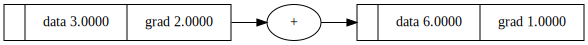

In [ ]:
a = Value(3.0)
b = a+a
b.backward()
draw_dot(b)

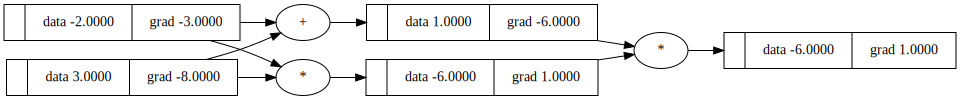

In [ ]:
a = Value(-2.0)
b = Value(3.0)
d= a*b
e = a+b
f =d*e
f.backward()
draw_dot(f)

# whenver a variable is use multiple itimes, gradients wont be right... because we are not accumulating gradients

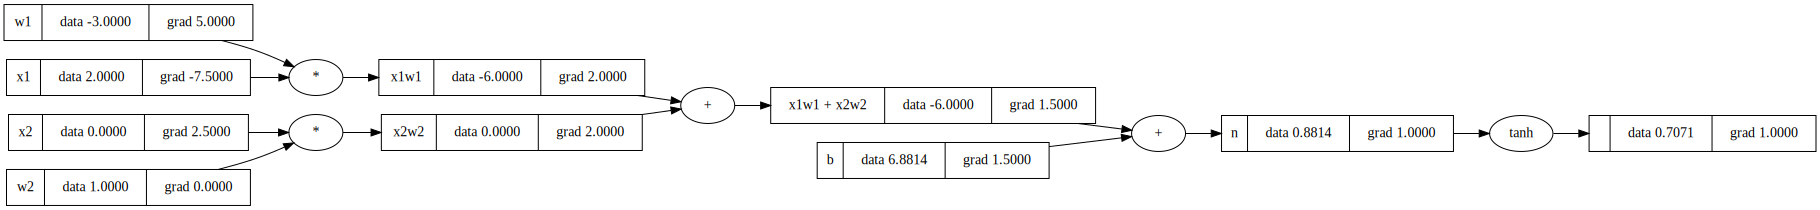

In [ ]:
# manual iteration of backward
o.grad = 1.0
# n._backward
# n.grad

o._backward()
n._backward()  # will propagate gradients to  x1w1x2w2 and b
b._backward()  # b is lead node.. so no propagation will happens, its just empty function
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()
draw_dot(o)

In [ ]:
o.grad =1.0

# --------------------------------------
# tanh
# do/dn = 1-tanh(n)**2
# do/dn = 1-o**2    # tanh(n)
o.data
1-(o.data)**2
n.grad = 0.5


#  ----------------------------------------
# addition is just flow of grqadinet , mean gradient will flow to both of nodes equally
x1w1x2w2.grad = 0.5  # becuase addition gives 1 and this 0.5 comes from chain rule
b.grad =0.5


# ---------------------------------------------------

x1w1.grad = 0.5
x2w2.grad = 0.5


# -------------------------------------------------------

x2.grad = w2.data * x2w2.grad  # x2 and w2 are zero becasue if x2 is zero(mean no effect) then w2 has to be zero
w2.grad = x2.data * x2w2.grad

x1.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad


# -------------------------



Value(data=-8.0, label=L)


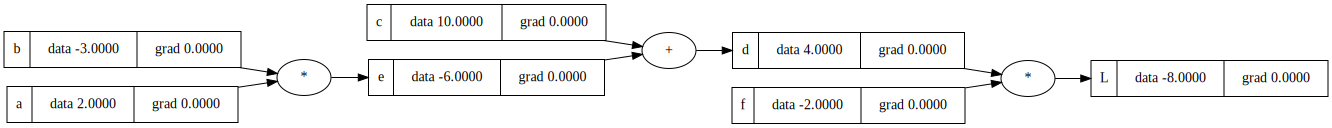

In [ ]:
a= Value(2.0, label="a")
b= Value(-3.0, label="b")
c= Value(10.0, label="c")
e = a * b; e.label="e"
d = e +c;d.label = "d"
f = Value(-2.0, label='f')
L=d*f; L.label = "L"
# print(a,b,c,d)
print(L)

draw_dot(L)




In [ ]:
# deerivative with self
def lwl():
    h=0.1
    a= Value(2.0, label="a")
    b= Value(-3.0, label="b")
    c= Value(10.0, label="c")
    e = a * b; e.label="e"
    d = e +c;d.label = "d"
    f = Value(-2.0, label='f')
    L=d*f; L.label = "L1"
    # print(a,b,c,d)
    # print(L)
    L1 = L.data
    # step ii
    
    L2=L1+h; L.label = "L2"
    # L+=h
    
    
    print((L2-L1)/h)
    

    
lwl()

# so,
L.grad = 1




0.9999999999999964


In [ ]:
# deerivative with d

#L = d*f
#L/dd = f
#L/df = d

#L = d+f
#L/dd = 1
#L/df = 1


def lwd():
    
    h=0.1
    a= Value(2.0, label="a")
    b= Value(-3.0, label="b")
    c= Value(10.0, label="c")
    e = a * b; e.label="e"
    d = e +c;d.label = "d"
    f = Value(-2.0, label='f')
    L=d*f; L.label = "L1"
    # print(a,b,c,d)
    # print(L)
    L1 = L.data
    # step ii
    
    
    d = (e +c)+h;d.label = "d"
    f = Value(-2.0, label='f')
    L2=(d*f).data; L.label = "L2"
    
    
    
    # L+=h
    
    
    print((L2-L1)/h)
    

    
lwd()

# so,
d.grad = -1.999999999999993
"""
*
    L = d*f
    L/dd = f
    L/df = d
+
    L = d+f
    L/dd = 1
    L/df = 1
    
    
    d = c + e
    dd/dc =1
    dd/de =1
    
chain
    dL/dc = dL/dd * dd/dc
    dL/dc = -2 * 1
    dL/dc = -2
    
    so c.grad = -2
    
    
    for a :
    
    e = a*b
    de/da = b
    de/db = a
    
    
    dL/da = dL/dd * dd/de * de/da
    dL/da = -2 * 1 * -3.0
    dL/da = 6
    
    dL/db = dL/dd * dd/de * de/db
    dL/db = -2 * 1 * 2.0
    dL/db = -4
    
"""

d.grad = -2 # value of f
f.grad = 4.0 # value of d
c.grad = -2
e.grad = -2
a.grad = 6.0
b.grad = -4

# for multiplication: When differentiating with respect to one variable, the other variable is treated as a constant, leading to the result that the derivative is simply the other variable.
# for addition: both wil be one 


-1.999999999999993


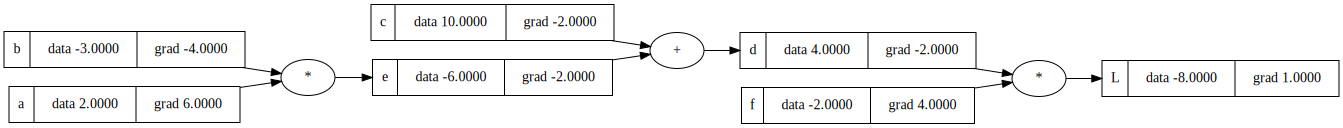

In [ ]:
draw_dot(L)

In [ ]:
# deerivative with a
def lwa():
    h=0.1
    a= Value(2.0, label="a")
    b= Value(-3.0, label="b")
    c= Value(10.0, label="c")
    e = a * b; e.label="e"
    d = e +c;d.label = "d"
    f = Value(-2.0, label='f')
    L=d*f; L.label = "L1"
    # print(a,b,c,d)
    # print(L)
    L1 = L.data
    # step ii
    
    
    a= Value(2.0+h, label="a")
    e = a * b; e.label="e"
    d = e +c;d.label = "d"
    f = Value(-2.0, label='f')
    L2=(d*f).data; L.label = "L2"
    
    
    
    # L+=h
    
    
    print((L2-L1)/h)
    

    
lwa()

# so,
a.grad = 6.000000000000014




6.000000000000014


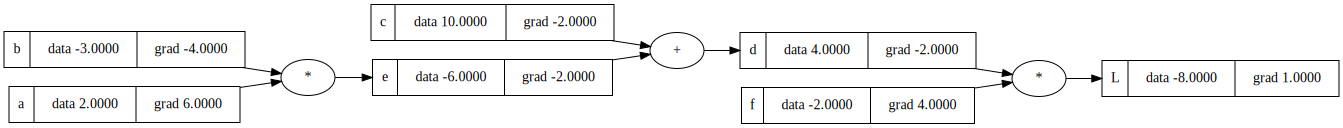

In [ ]:
    draw_dot(L)

## optimizing


In [ ]:
# trying to make L go up
# to make L go up we need to go in direction of gradient


a.data +=  a.grad * 0.1 # to nudge the value in gradient direction increases L.

# deerivative with a
def nudging():
    h=0.1
    a= Value(2.0, label="a")
    b= Value(-3.0, label="b")
    c= Value(10.0, label="c")
    e = a * b; e.label="e"
    d = e +c;d.label = "d"
    f = Value(-2.0, label='f')
    L=d*f; L.label = "L1"
    # print(a,b,c,d)
    # print(L)
    L1 = L.data
    print("a:", a)
    print("b:", b)
    print("c:", c)
    print("d:", d)
    print("e:", e)
    print("f:", f)
    
    print("L1:", L1,"\n")
    # step ii
    
    
    
    # d.grad = -2 # value of f
    f.grad = 4.0 # value of d
    c.grad = -2
    # e.grad = -2
    a.grad = 6.0
    b.grad = -4
    print("a.grad:", a.grad)
    print("b.grad:", b.grad)
    print("c.grad:", c.grad)
    print("d.grad:", d.grad)
    print("e.grad:", e.grad)
    print("f.grad:", f.grad)
    for i in range(3):
        a.data +=  a.grad * 0.1
        b.data +=  b.grad * 0.1
        c.data +=  c.grad * 0.1
        f.data +=  f.grad * 0.1
        e = a * b; e.label="e"
        d = e +c;d.label = "d"
        f = Value(-2.0, label='f')
        L2=(d*f).data; L.label = "L2"
    
    
        print("a:", a)
        print("b:", b)
        print("c:", c)
        print("d:", d)
        print("e:", e)
        print("f:", f)
        print("increasing L:", L2, "\n\n\n")

    
    
    # L+=h
    
    
    # print((L2-L1)/h)
    

    
nudging()






a: Value(data=2.0, label=a)
b: Value(data=-3.0, label=b)
c: Value(data=10.0, label=c)
d: Value(data=4.0, label=d)
e: Value(data=-6.0, label=e)
f: Value(data=-2.0, label=f)
L1: -8.0 

a.grad: 6.0
b.grad: -4
c.grad: -2
d.grad: 0.0
e.grad: 0.0
f.grad: 4.0
a: Value(data=2.6, label=a)
b: Value(data=-3.4, label=b)
c: Value(data=9.8, label=c)
d: Value(data=0.9600000000000009, label=d)
e: Value(data=-8.84, label=e)
f: Value(data=-2.0, label=f)
increasing L: -1.9200000000000017 



a: Value(data=3.2, label=a)
b: Value(data=-3.8, label=b)
c: Value(data=9.600000000000001, label=c)
d: Value(data=-2.5599999999999987, label=d)
e: Value(data=-12.16, label=e)
f: Value(data=-2.0, label=f)
increasing L: 5.119999999999997 



a: Value(data=3.8000000000000003, label=a)
b: Value(data=-4.2, label=b)
c: Value(data=9.400000000000002, label=c)
d: Value(data=-6.5600000000000005, label=d)
e: Value(data=-15.960000000000003, label=e)
f: Value(data=-2.0, label=f)
increasing L: 13.120000000000001 





# Extra


In [ ]:

# print(Value(2))
a = Value(2.0)
b = Value(3.0)
a*(1/12)
-12.0+a
a*(-b)
a+2.0

Value(data=4.0)

In [ ]:
a.__add__(b), a.__mul__(b)

(Value(data=5.0), Value(data=6.0))

In [ ]:
type(-12)
-12.0 +a

Value(data=-10.0)

In [ ]:
x = Value(2.0)
-1.0 + x

Value(data=1.0)

In [ ]:
c= a+b
d = 5* c
d, d._prev,d._op, c._prev, c._op

(Value(data=25.0),
 {Value(data=5), Value(data=5.0)},
 '*',
 {Value(data=2.0), Value(data=3.0)},
 '+')

In [ ]:
class MyClass:
    def __init__(current, value):
        current.value = value

    def print_value(current):
        print(current.value)

obj = MyClass(42)
obj.print_value()  # prints 42


42
